In [55]:
import ROOT
import ctypes

In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [7]:


# # sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_antiKstar/standard.root")
# sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_antiKstar/standard.root")

# signal_1ab_tree = sig_1ab_file.Get("antiKstar")



In [8]:
# # D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
# # D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.72,1.92)
# # D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.67, 2.06)
# D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.67, 1.9)
# D0_cosHel_TH1F = ROOT.TH1F("D0_cosHel_TH1F","D0_cosHel",40, -1, 1)


In [9]:
# def extract_histo(tree, histogram):
#     for event in tree:
#         histogram.Fill(eve/nt.D0_M)
#     return histogram

In [10]:
# def extract_hist_coshel(tree, histogram):
#     for event in tree:
#         if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.68 and event.D0_M < 2.05 and event.dM_pi0_75MeV > 0.022:
#         #and event.gamma_E > 0.34:

#             histogram.Fill(event.D0_cosHel_0)
#     return histogram

In [11]:
# def apply_cuts(tree, histogram):
#     for event in tree:
#         # if event.D0_M > 1.67 and event.D0_M < 2.06:
#         if event.D0_M > 1.78 and event.D0_M < 1.92:

#             histogram.Fill(event.D0_M)
#     return histogram

In [12]:
# def extract_signals(tree, histogram):
#     for event in tree:
#         # if event.D0_M > 1.67 and event.D0_M < 2.06:
#         # if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 2.06:
#         if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 1.9 and event.dM_pi0_75MeV > 0.022:
#         #and event.gamma_E > 0.34:

#             histogram.Fill(event.D0_M)
#     return histogram

In [13]:
# D0_cosHel_TH1F = extract_hist_coshel(signal_1ab_tree, D0_cosHel_TH1F)
# c1 = ROOT.TCanvas()
# D0_cosHel_TH1F.Draw()
# c1.Draw()

In [14]:

# D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# # D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

# c1 = ROOT.TCanvas()
# D0_M_TH1F_2.Draw()
# c1.Draw()

In [15]:

# scale_factor = D0_M_TH1F_2.GetEntries()/D0_M_TH1F.GetEntries()

In [16]:
# scale_factor

In [84]:
#file_list = ['/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root']
file_list = ["/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_antiKstar/standard.root"]


In [85]:
mychain = ROOT.TChain("antiKstar")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain.Add(i)

In [86]:
yrange = (-1, 1)

x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
# z = ROOT.RooRealVar("Belle2Pi0Veto_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
z = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
a = ROOT.RooRealVar("iCascDcyBrP_Dst_0", "",0,10000, "")

# a = iCascDcyBrP_Dst_0

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z, a), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dst_0 ==0  ")


w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
w_1.setVal(1)
before_data.addColumn(w_1)
data1 = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
N_total = data1.sumEntries()
print(N_total)

63039.0
[#1] INFO:InputArguments -- The formula  D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dst_0 ==0   claims to use the variables (D0_M,D0_cosHel_0,dM_pi0_75MeV,iCascDcyBrP_Dst_0) but only (D0_M,dM_pi0_75MeV,iCascDcyBrP_Dst_0) seem to be in use.
  inputs:          D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dst_0 ==0  
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(iCascDcyBrP_Dst_0) TTree Int_t branch iCascDcyBrP_Dst_0 will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #25 because iCascDcyBrP_Dst_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #100 because iCascDcyBrP_Dst_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #107 because iCascDcyBrP_Dst_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #138 bec

In [87]:
#file_list = ['/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root']
file_list = ["/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_antiKstar_cc/standard.root"]


In [88]:
mychain2 = ROOT.TChain("antiKstar_cc")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain2.Add(i)

In [89]:

# a = iCascDcyBrP_Dst_0
b = ROOT.RooRealVar("iCascDcyBrP_Dstm_0", "",0,10000, "")

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data2 = ROOT.RooDataSet("data2","", ROOT.RooArgSet(x,y,z, b), ROOT.RooFit.Import(mychain2), Cut=" D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dstm_0 ==0  ")


# w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
# w_1.setVal(1) 
before_data2.addColumn(w_1)
data2 = ROOT.RooDataSet(before_data2.GetName(), before_data2.GetTitle(),before_data2, before_data2.get(), '' ,  'w_1')
N_total = data2.sumEntries()
print(N_total)

59558.0
[#1] INFO:InputArguments -- The formula  D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dstm_0 ==0   claims to use the variables (D0_M,D0_cosHel_0,dM_pi0_75MeV,iCascDcyBrP_Dstm_0) but only (D0_M,dM_pi0_75MeV,iCascDcyBrP_Dstm_0) seem to be in use.
  inputs:          D0_M>1.68 & D0_M<2.05 & dM_pi0_75MeV > 0.022 & iCascDcyBrP_Dstm_0 ==0  
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(iCascDcyBrP_Dstm_0) TTree Int_t branch iCascDcyBrP_Dstm_0 will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #211 because iCascDcyBrP_Dstm_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #227 because iCascDcyBrP_Dstm_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #238 because iCascDcyBrP_Dstm_0 cannot accommodate the value -1
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping 

In [90]:
data1.append(data2)

In [91]:
data1

In [92]:
data1.sumEntries()

122597.0

# D0_M

In [93]:
fitting_region = (1.68, 2.05)
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# # x.setBins(50)
# l = ROOT.RooArgList(x)
# # signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F_2, 1)


In [94]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.84,1.83, 1.86)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.01,0,0.04)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0,0.05)
alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,2)
n_CB = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,2)
 
Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.7,1.67,1.8)    
Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.02,0,0.5)
alpha2 = ROOT.RooRealVar("alph2", "width of gaussians", 0.5,0,2)
n_CB2 = ROOT.RooRealVar("n_CB2", "width of gaussians", 5,0,10)

In [95]:
sigmaL = ROOT.RooRealVar("sigmaL", "width of gaussians", 0.01,0,0.04)
sigmaR = ROOT.RooRealVar("sigmaR", "width of gaussians", 0.01,0,0.04)
alphaL = ROOT.RooRealVar("alphaL", "width of gaussians", 0.5,0,2)
nL     = ROOT.RooRealVar("nL", "width of gaussians", 0.5,0,4)
alphaR = ROOT.RooRealVar("alphaR", "width of gaussians", 0.5,0,3)
nR     = ROOT.RooRealVar("nR", "width of gaussians", 0.5,0,2)

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.04] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigmaL' with range [0, 0.04] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigmaR' with range [0, 0.04] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'alphaL' with range [0, 2] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'alphaR' with range [0, 3] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'nL' with range [0, 4] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARN

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_1ab_Vpi0.png has been created


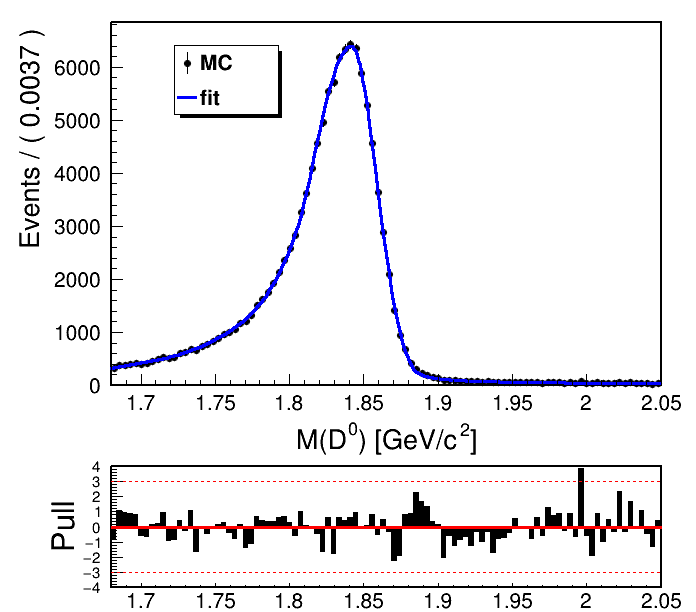

In [96]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# # sig1 = ROOT.RooNovosibirsk("sig1", "Signal component 3", x, mean, Novo_width, Novo_tail)
# # sig1 = ROOT.RooNovosibirsk("sig1", "Signal component 3", x, Novo_peak, Novo_width, Novo_tail)
# # sig1 = ROOT.RooCBShape("sig1", "Signal component 2", x, mean, sigma3, alpha2, n_CB2)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)



# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

#model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)

model = ROOT.RooCrystalBall("model", "Signal component 2", x, mean, sigmaL, sigmaR, alphaL, nL, alphaR, nR)

# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)


# # # Create the Crystal Ball function
# cb = ROOT.RooCBShape("cb", "Crystal Ball", x, mean, sigma2, alpha, n_CB)

# # Create the parameters for the Gaussian function
# mean_gauss = ROOT.RooRealVar("mean_gauss", "Mean of Gaussian", 0, 0, 1)
# sigma_gauss = ROOT.RooRealVar("sigma_gauss", "Width of Gaussian", 0.01, 0.001, 0.5)

# # Create the Gaussian function
# gauss = ROOT.RooGaussian("gauss", "Gaussian", x, mean_gauss, sigma_gauss)

# # Create the convolution PDF using RooFFTConvPdf
# model = ROOT.RooFFTConvPdf("model", "Convolution PDF", x, cb, gauss)



# r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)
#r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)
r = model.fitTo(data1,NumCPU=12,Range=fitting_region,PrintLevel=1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

#signalhist.plotOn(frame,Name = "data1", XErrorSize=0)
data1.plotOn(frame,Name = "data1", XErrorSize=0)

model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.25, 0.75, 0.4, 0.9)
# leg1.SetBorderSize(0)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_1ab_Vpi0.png")

f = ROOT.TFile("antiKstarg_Vpi0_fitresult.root", "RECREATE")
r.Write("antiKstarg")
f.Close()


In [97]:
model.Print()

RooCrystalBall::model[ x=D0_M x0=mean sigmaL=sigmaL sigmaR=sigmaR alphaL=alphaL nL=nL alphaR=alphaR nR=nR ] = 0.386412


In [98]:
model.Print("t")

0x55ad4987a840 RooCrystalBall::model = 0.386412 [Auto,Dirty] 
  0x55ad4975dcd0/V- RooRealVar::D0_M = 1.865
  0x55ad4a250200/V- RooRealVar::mean = 1.84161 +/- 0.000300918
  0x55ad2d0b6d70/V- RooRealVar::sigmaL = 0.0282397 +/- 0.000590445
  0x55ad2ce07b20/V- RooRealVar::sigmaR = 0.0169602 +/- 0.000187329
  0x55ad2cfff0e0/V- RooRealVar::alphaL = 0.986811 +/- 0.0271146
  0x55ad2b867430/V- RooRealVar::nL = 2.13154 +/- 0.101029
  0x55ad2dc63530/V- RooRealVar::alphaR = 2.41364 +/- 0.0291244
  0x55ad2b79c3c0/V- RooRealVar::nR = 0.615249 +/- 0.0366047


In [99]:
f = ROOT.TFile.Open("antiKstarg_Vpi0_fitresult.root")
r2 = ROOT.gDirectory.Get("antiKstarg")
f.Close()


In [100]:
r2.Print()


  RooFitResult: minimized FCN value: -227001, estimated distance to minimum: 1.551e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                alphaL    9.8681e-01 +/-  2.71e-02
                alphaR    2.4136e+00 +/-  2.91e-02
                  mean    1.8416e+00 +/-  3.01e-04
                    nL    2.1315e+00 +/-  1.01e-01
                    nR    6.1525e-01 +/-  3.66e-02
                sigmaL    2.8240e-02 +/-  5.90e-04
                sigmaR    1.6960e-02 +/-  1.87e-04



In [20]:
r2.correlation("alpha","n_CB")

-0.8745236220190833

In [21]:
r2.edm()

4.0401224791271204e-05

In [22]:
r2.correlationMatrix()

<cppyy.gbl.TMatrixTSym<double> object at 0x55998a4fdb00>

# cosHel

In [33]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared", "x,c0", "", "c0*x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared.cxx+")

94202724847920

(MyPdf_xsquared) An instance of MyPdf_xsquared.


In [101]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
# ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

In [102]:
fitting_region = (-1, 1)
# y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", fitting_region[0], fitting_region[1], "")
# # y.setBins(50)
# y_l = ROOT.RooArgList(y)
# # signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# y_signalhist = ROOT.RooDataHist("y_signalhist", "sighist", y_l, D0_cosHel_TH1F, 1)


In [103]:
y_mean = ROOT.RooRealVar("y_mean", "mean of gaussians", 0.5,0.4, 0.6)
y_sigma1 = ROOT.RooRealVar("y_sigma1", "width of gaussians", 0.03,0,0.3)
y_sigma2 = ROOT.RooRealVar("y_sigma2", "width of gaussians", 0.02,0,0.3)

c0 = ROOT.RooRealVar("c0", "c0",0.2, 0,1)


Cheby_c0 = ROOT.RooRealVar("Cheby_c0", "c0",0.2, -1,1)
Cheby_c1 = ROOT.RooRealVar("Cheby_c1", "c0",0.2, -1,1)
Cheby_c2 = ROOT.RooRealVar("Cheby_c2", "c0",-0.2, -1,1)
Cheby_c3 = ROOT.RooRealVar("Cheby_c3", "c0",-0.2, -1,1)


[#0] WARNING:InputArguments -- The parameter 'y_sigma1' with range [0, 0.3] of the RooGaussian 'sig2_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'y_sigma2' with range [0, 0.3] of the RooGaussian 'sig2_2' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig3,sig2_1,sig2_2)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (sig

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_1ab_Vpi0_coshel.png has been created


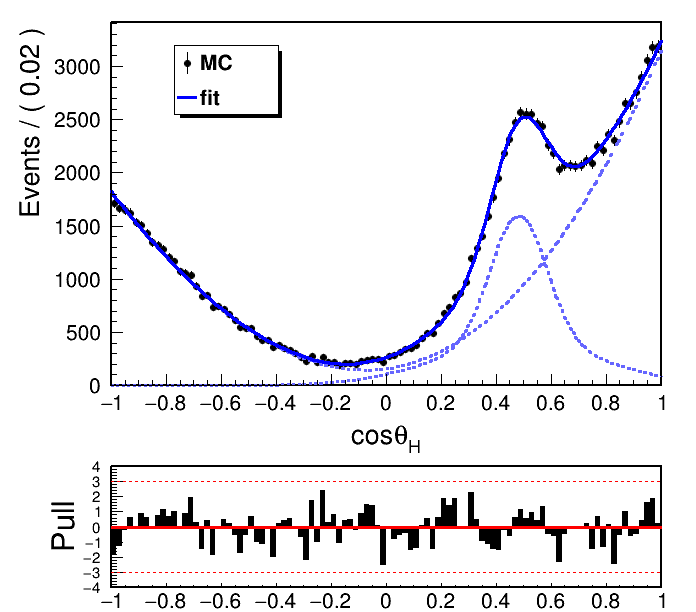

In [114]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))


# y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)
# model = ROOT.MyPdf_xsquared_nopara("model", "y_bkg1", y)
# sig1 = ROOT.MyPdf_xsquared_nopara("sig1", "y_bkg1", y)
#sig1 = ROOT.MyPdf_xsquared("sig1", "y_bkg1", y, c0)


sig2_1 = ROOT.RooGaussian("sig2_1", "Signal component 1", y, y_mean, y_sigma1)
sig2_2 = ROOT.RooGaussian("sig2_2", "Signal component 1", y, y_mean, y_sigma2)

frac2 = ROOT.RooRealVar("frac2", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig2 = ROOT.RooAddPdf("sig2", "model", [sig2_1, sig2_2], frac2)


sig3 = ROOT.RooChebychev("sig3", "Signal component 1", y, ROOT.RooArgList(Cheby_c0, Cheby_c1, Cheby_c2))

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)


# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

#sig_model1 = ROOT.RooAddPdf("sig_model1", "model", [sig1, sig2], sig1frac)
#model = ROOT.RooAddPdf("model", "model", [sig3, sig_model1], sig2frac)


model = ROOT.RooAddPdf("model", "model", [sig3, sig2], sig2frac)

run = model.fitTo(data1,NumCPU=12,Range=(-1,1),PrintLevel=-1, Save=1)

#run = model.fitTo(y_signalhist,NumCPU=12,Range=(-1,1),PrintLevel=-1, Save=1)
# run = model.fitTo(y_signalhist,NumCPU=12,Range=(-1,1),PrintLevel=-1)

run.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = y.frame(Title=" ")

#y_signalhist.plotOn(frame,Name = "data1", XErrorSize=0)
data1.plotOn(frame,Name = "data1", XErrorSize=0)

# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)

# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.25, 0.75, 0.4, 0.9)
# leg1.SetBorderSize(0)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = y.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()


canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_1ab_Vpi0_coshel.png")

f = ROOT.TFile("antiKstarg_Vpi0_fitresult_coshel.root", "RECREATE")
run.Write("antiKstarg")
f.Close()


In [115]:
model.Print("t")

0x55ad48fcb250 RooAddPdf::model = 0.122122 [Auto,Dirty] 
  0x55ad4c6719a0/V- RooChebychev::sig3 = 0.11927 [Auto,Dirty] 
    0x55ad4912ddf0/V- RooRealVar::D0_cosHel_0 = 0
    0x55ad490327a0/V- RooRealVar::Cheby_c0 = 0.43952 +/- 0.0131709
    0x55ad49069fe0/V- RooRealVar::Cheby_c1 = 0.88073 +/- 0.0252406
    0x55ad486ec4a0/V- RooRealVar::Cheby_c2 = 0.062089 +/- 0.0149084
  0x55ad563d7590/V- RooRealVar::sig2frac = 0.760444 +/- 0.0250021
  0x55ad41760ad0/V- RooAddPdf::sig2 = 0.131174 [Auto,Dirty] 
    0x55ad424a7570/V- RooGaussian::sig2_1 = 0.274433 [Auto,Dirty] 
      0x55ad4912ddf0/V- RooRealVar::D0_cosHel_0 = 0
      0x55ad574f7de0/V- RooRealVar::y_mean = 0.48244 +/- 0.00170302
      0x55ad537b8910/V- RooRealVar::y_sigma1 = 0.3 +/- 0.202337
    0x55ad41c8a610/V- RooRealVar::frac2 = 0.477958 +/- 0.0390501
    0x55ad4c782b90/V- RooGaussian::sig2_2 = 1.266e-05 [Auto,Dirty] 
      0x55ad4912ddf0/V- RooRealVar::D0_cosHel_0 = 0
      0x55ad574f7de0/V- RooRealVar::y_mean = 0.48244 +/- 0.001703

In [116]:
f2 = ROOT.TFile.Open("antiKstarg_Vpi0_fitresult_coshel.root")
r3 = ROOT.gDirectory.Get("antiKstarg")
f2.Close()


In [117]:
r3.Print()


  RooFitResult: minimized FCN value: 51227.3, estimated distance to minimum: 7.753e-05
                covariance matrix quality: Full matrix, but forced positive-definite
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
              Cheby_c0    4.3952e-01 +/-  1.32e-02
              Cheby_c1    8.8073e-01 +/-  2.52e-02
              Cheby_c2    6.2089e-02 +/-  1.49e-02
                 frac2    4.7796e-01 +/-  3.91e-02
              sig2frac    7.6044e-01 +/-  2.50e-02
                y_mean    4.8244e-01 +/-  1.70e-03
              y_sigma1    3.0000e-01 +/-  2.02e-01
              y_sigma2    1.0159e-01 +/-  3.14e-03

